# Load celltypist results

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
#from insitupy import InSituData, InSituExperiment, CACHE
import scanpy as sc
from tqdm import tqdm
import anndata
import pandas as pd
import numpy as np
import warnings

## Reload after celltypist run

Celltypist was run using the script [CRC05a_run_celltypist.py](./CRC05a_run_celltypist.py). Here we did use [celltypist](https://www.celltypist.org) in its simplest configuration but it might also be an option to use `mode = 'prob match', p_thres = 0.5` for multi-label classification as shown in [CRC05b_run_celltypist_multi-label.py](./CRC05b_run_celltypist_multi-label.py).

The result file of the celltypist analysis is also available on Zenodo under the DOI: **TODO**. For this script to work, download the files and move them into the path `data/zenodo` within this repository.

In [3]:
data_path = Path("../data/zenodo/celltypist_rounded_5000_1e2.h5ad")
adata1e2 = sc.read(data_path)

In [4]:
adata1e2

AnnData object with n_obs × n_vars = 1018411 × 280
    obs: 'original_cell_id', 'centroid_x', 'centroid_y', 'centroid_z', 'fov', 'cluster', 'volume', 'scale', 'population', 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes', 'uid', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'majority_voting_simple'
    var: 'gene_names', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'neighbors', 'over_clustering'
    obsm: 'X_pca', 'spatial'
    layers: 'counts', 'counts_proseg', 'counts_rounded', 'log1p', 'norm_counts', 'scaled_log1p'
    obsp: 'connectivities', 'distances'

In [5]:
import matplotlib.pyplot as plt
import scanpy as sc

def plot_all_uids(adata, color: str, groupby="uid", spot_size=10, ncols=4):
    uids = sorted(adata.obs[groupby].unique())
    nrows = (len(uids) + ncols - 1) // ncols  # Calculate number of rows needed

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, uid in enumerate(uids):
        ax = axes[i]
        sc.pl.spatial(adata[adata.obs[groupby] == uid], color=color, spot_size=spot_size, ax=ax, show=False, legend_loc=None)
        ax.set_title(f'UID: {uid}')

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

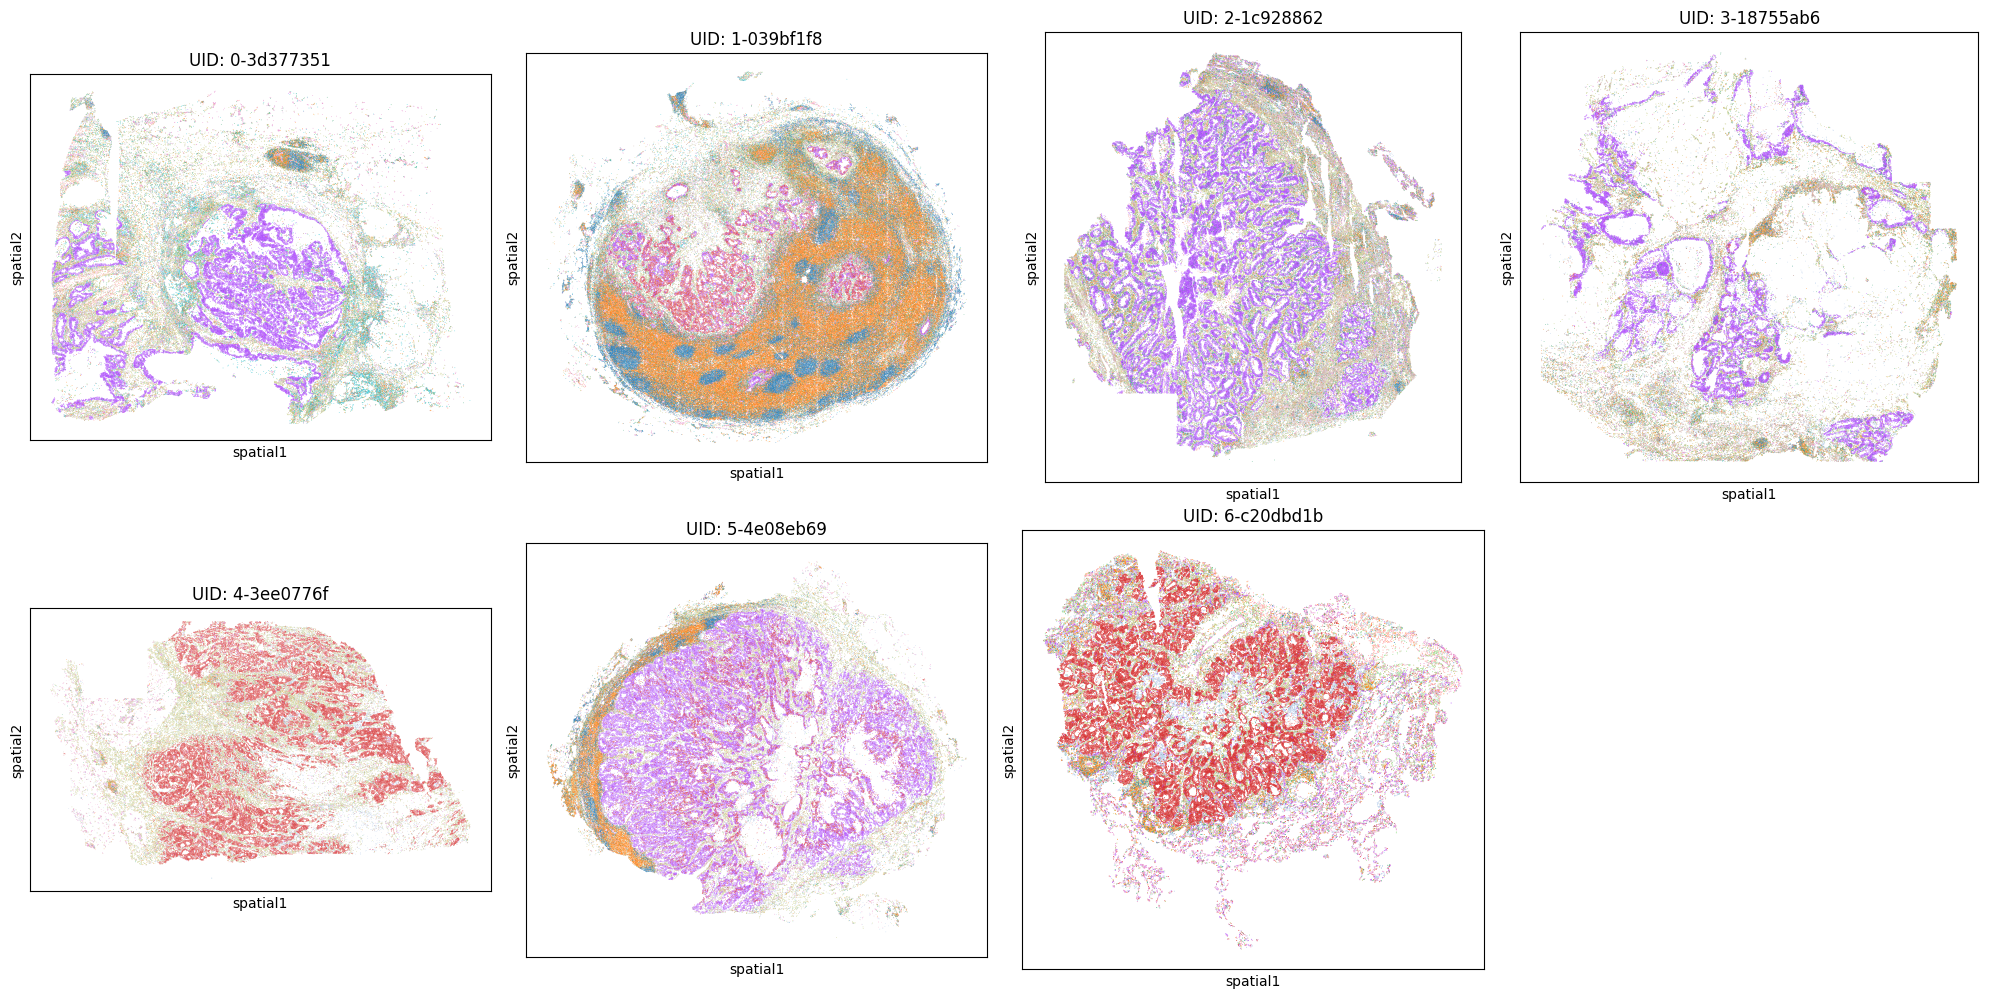

In [6]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Example usage
    plot_all_uids(adata1e2, color="majority_voting")

C:\Users\ge37voy\AppData\Local\Temp\ipykernel_30992\3352862358.py:3: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata[adata.obs["uid"] == uid], color=["majority_voting", "predicted_labels"], spot_size=10, ncols=1)
c:\Users\ge37voy\AppData\Local\miniconda3\envs\insitupy\lib\site-packages\scanpy\plotting\_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


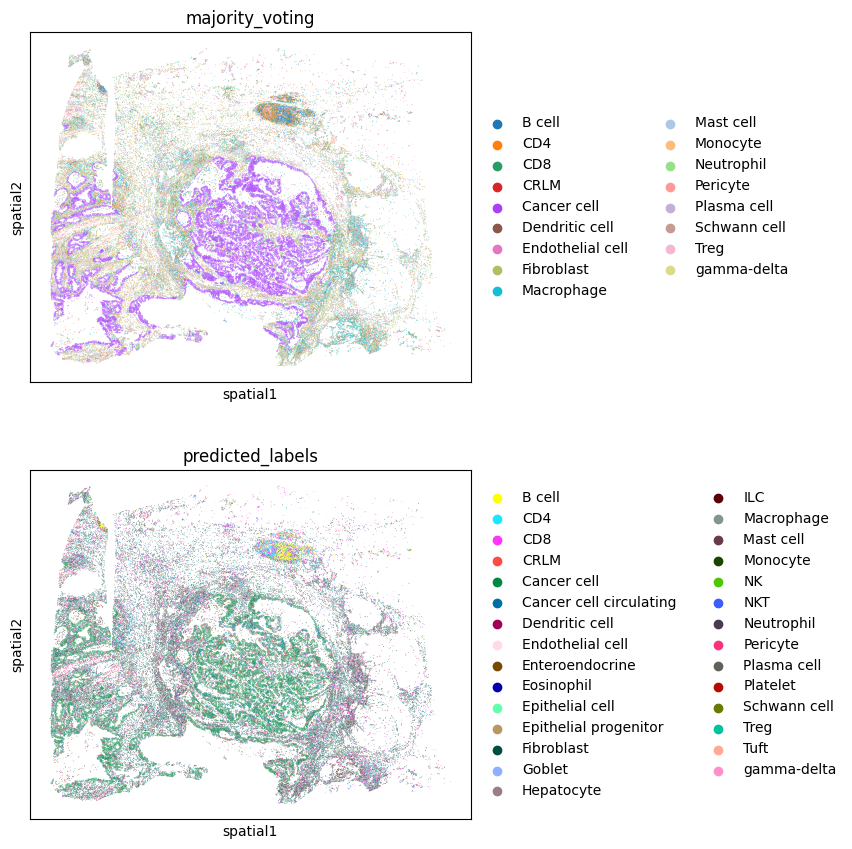

In [7]:
adata = adata1e2
uid = sorted(adata.obs["uid"].unique())[0]
sc.pl.spatial(adata[adata.obs["uid"] == uid], color=["majority_voting", "predicted_labels"], spot_size=10, ncols=1)

### Perform dimensionality reduction on subsample of data

In [8]:
sample = sc.pp.sample(adata1e2, fraction=0.1, copy=True)

In [9]:
sample

AnnData object with n_obs × n_vars = 101841 × 280
    obs: 'original_cell_id', 'centroid_x', 'centroid_y', 'centroid_z', 'fov', 'cluster', 'volume', 'scale', 'population', 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes', 'uid', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'majority_voting_simple'
    var: 'gene_names', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'neighbors', 'over_clustering'
    obsm: 'X_pca', 'spatial'
    layers: 'counts', 'counts_proseg', 'counts_rounded', 'log1p', 'norm_counts', 'scaled_log1p'
    obsp: 'connectivities', 'distances'

In [10]:
adata = sample
print("Perform PCA...", flush=True)
sc.pp.pca(adata)

print("Calculate neighbors...", flush=True)
# calculate neighbors
sc.pp.neighbors(adata)

print("Perform UMAP...", flush=True)
# dimensionality reduction
sc.tl.umap(adata)

print("Perform Leiden clustering...", flush=True)
# leiden clustering
sc.tl.leiden(adata)

Perform PCA...
Calculate neighbors...
Perform UMAP...
Perform Leiden clustering...


C:\Users\ge37voy\AppData\Local\Temp\ipykernel_30992\2372987789.py:15: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


In [11]:
adata

AnnData object with n_obs × n_vars = 101841 × 280
    obs: 'original_cell_id', 'centroid_x', 'centroid_y', 'centroid_z', 'fov', 'cluster', 'volume', 'scale', 'population', 'n_genes_by_counts', 'total_counts', 'n_counts', 'n_genes', 'uid', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'majority_voting_simple', 'leiden'
    var: 'gene_names', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'neighbors', 'over_clustering', 'pca', 'umap', 'leiden'
    obsm: 'X_pca', 'spatial', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'counts_proseg', 'counts_rounded', 'log1p', 'norm_counts', 'scaled_log1p'
    obsp: 'connectivities', 'distances'

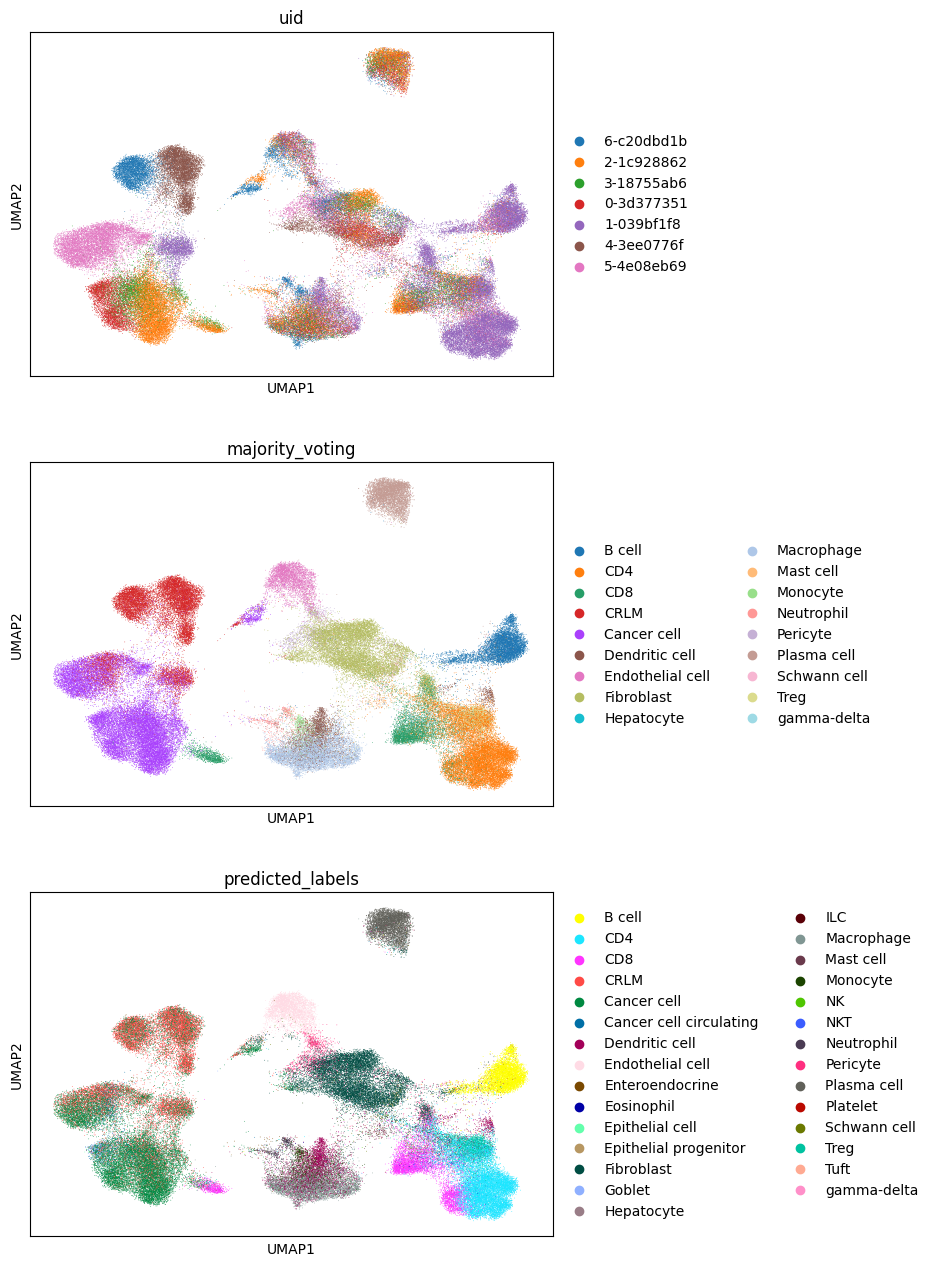

In [12]:
sc.pl.umap(adata, color=["uid", "majority_voting", "predicted_labels"], ncols=1)

#### Summarize the terms CRLM and Cancer cell into one term "Cancer cell"

In [13]:
adata1e2.obs["majority_voting_simple"] = adata1e2.obs["majority_voting"].str.replace("CRLM", "Cancer cell")

Save changes.

In [14]:
adata1e2.write(data_path)

In [15]:
adata1e2.obs["majority_voting_simple"].value_counts()

majority_voting_simple
Cancer cell         363143
CD4                 153404
Fibroblast          129441
Macrophage           75827
B cell               64943
CD8                  58510
Plasma cell          52147
Endothelial cell     36469
Dendritic cell       34211
Treg                 18661
Pericyte             11111
Neutrophil            6598
Monocyte              6500
gamma-delta           2839
Mast cell             2328
Schwann cell          2251
Hepatocyte              28
Name: count, dtype: int64